In [1]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
import matplotlib.cm as cm
from glob import glob
from collections import Counter
#import seaborn as sns
import math
import scipy
from scipy.interpolate import interp1d
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
from random import shuffle

import unit_convert
import GCE as gce
import ns
import history_cmc as hic
import dynamics as dyn
%matplotlib inline

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1095/syr904/projects/GCE/'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

2.1.2


66
[0, 6.491280673671948e+33, 4.2678837570122586e+33, 0, 2.2983018970055383e+30, 0, 1.8014401321575994e+33, 1.5980338373109294e+35, 0, 0, 8.073900655285593e+34, 1.780577091654932e+35, 5.144911919324941e+33, 0, 4.298274184966662e+34, 0, 0, 0, 7.510325045788572e+33, 4.891258488160972e+34, 0, 8.125957317362413e+32, 6.138139231328646e+33, 1.2947872372628664e+35, 0, 3.330559397552841e+33, 9.944750135880523e+30, 0, 3.283225002192675e+33, 2.0823619005460828e+33, 2.8139483790274604e+33, 4.761136067338525e+35, 0, 7.04864785988317e+33, 1.37304689071921e+34, 1.9131807636967385e+35, 5.604480164486045e+29, 4.900383193819848e+31, 8.245548485581331e+33, 5.903194716465421e+33, 0, 2.5889065946851622e+33, 5.328581243473996e+33, 2.2954720147894986e+35, 0, 4.883771760762755e+32, 5.97522859966595e+33, 9.92307052604728e+34, 0, 2.124054867547232e+33, 2.5507277831132083e+33, 6.440074378899873e+34, 0, 0, 0, 3.0794226969548475e+35, 6.62834774322217e+30, 5.282827643228263e+33, 2.571108886820864e+34, 1.5150016900

Text(0.5,1,'Only MSPs')

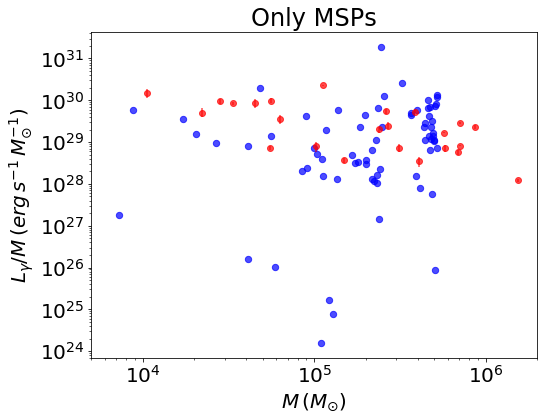

In [2]:
##Plot L_gamma vs. Total mass of the  GCs
L_gamma_tot, L_gamma_msp, L_gamma_psr, M = gce.find_Lgammaray_lastsnapshot('/projects/b1095/syr904/projects/GCE/catalog/', 0.1)
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
status = pathlist[:,1]; paths = pathlist[:,0]
clusterproperty = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/clusterproperty_maingrid_last.dat')
Npsr = clusterproperty[:,10]; Nmsp = clusterproperty[:,11]

Lgamma_obs=np.genfromtxt('/projects/b1095/syr904/projects/GCE/lgamma.txt')
mass_obs=np.array(Lgamma_obs[:,0]); lgamma_obs=np.array(Lgamma_obs[:,1])
lgamma_obs_max=np.array(Lgamma_obs[:,2]); lgamma_obs_min=np.array(Lgamma_obs[:,3])
lgamma_lowerr=lgamma_obs-lgamma_obs_min; lgamma_uperr=lgamma_obs_max-lgamma_obs
lgamma_error=[lgamma_lowerr, lgamma_uperr]

print(L_gamma_tot)
print(len(L_gamma_tot), len(L_gamma_msp))

#index=[]
#for i in range(len(L_gamma_tot)):
#    if L_gamma_tot[i]==0.:
#        index.append(i)
#    if L_gamma_tot[i]/M[i]<=10**28 and L_gamma_tot[i]/M[i]>0:
#        print(i, status[i])
#        #index.append(i)
        
index_msp = []
for j in range(len(L_gamma_msp)):
    if L_gamma_msp[j]==0.:
        index_msp.append(j)
    if L_gamma_msp[j]/M[j]<=10**28 and L_gamma_msp[j]/M[j]>0:
        print(j, status[j], paths[j], Npsr[j], Nmsp[j])
        
        
#L_tot_new = [x for y, x in enumerate(L_gamma_tot) if y not in index]
#M_new = [m for n, m in enumerate(M) if n not in index]
#L_tot_new=np.array(L_tot_new); M=np.array(M)

L_msp_new = [x for y, x in enumerate(L_gamma_msp) if y not in index_msp]
M_msp_new = [m for n, m in enumerate(M) if n not in index_msp]
L_msp_new=np.array(L_msp_new); M_msp_new=np.array(M_msp_new)

#Lzero=np.where(L_gamma==0)[0]
#L_gamma=np.delete(L_gamma, Lzero); M=np.delete(M, Lzero)
#print L_gamma, M#, Lzero

matplotlib.rcParams.update({'font.size': 20})

plt.figure(figsize=(8, 6))
plt.scatter(M_msp_new, L_msp_new/M_msp_new, color='b', s=40, alpha=0.7)
plt.errorbar(mass_obs, lgamma_obs, yerr=lgamma_error, fmt='o', color='red', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5*10**3, 2*10**6)
plt.xlabel(r'$M\,(M_{\odot})$')
plt.ylabel(r'$L_{\gamma}/M\,(erg\,s^{-1}\,M_{\odot}^{-1})$')
plt.title('Only MSPs')

#plt.savefig(figsave+'Gamma_M_msp.pdf', dpi=300)

[23, 29, 34, 33] [28, 33, 33, 25] [37, 41, 41]
[ 0.          0.          0.          1.33333333 12.33333333 30.
 30.         30.         30.         30.         30.66666667 31.
 31.         31.         31.         31.         31.         31.
 31.         31.         31.         31.         31.         31.
 32.         33.         33.         33.         33.         33.
 33.         33.33333333 34.33333333 35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.   

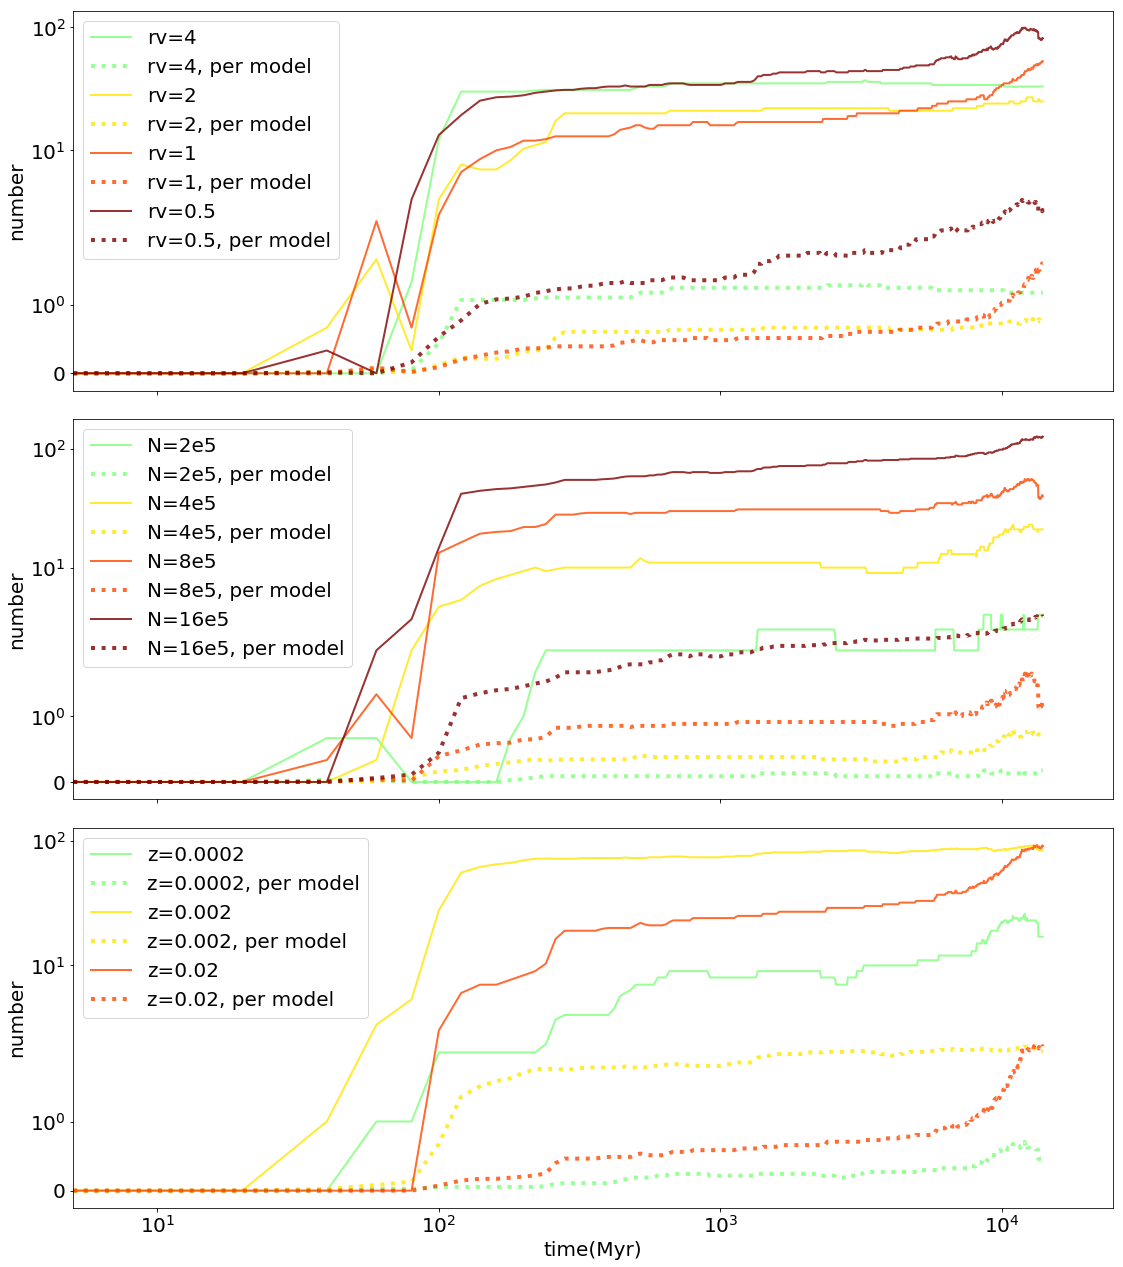

In [4]:
##Plot number of pulsars vs. time
pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

n_model_mass = [0,0,0,0]; n_model_rv = [0,0,0,0]; n_model_z = [0,0,0]
for ii in range(len(paths)):
    ##Initial Conditions
    s=paths[ii].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    if n_star==200000. and status[ii]=='1': 
        n_model_mass[0]+=1
    if n_star==400000. and status[ii]=='1': 
        n_model_mass[1]+=1
    if n_star==800000. and status[ii]=='1': 
        n_model_mass[2]+=1
    if n_star==1600000. and status[ii]=='1': 
        n_model_mass[3]+=1
        
    if rv==4. and status[ii]=='1': 
        n_model_rv[0]+=1
    if rv==2. and status[ii]=='1': 
        n_model_rv[1]+=1
    if rv==1. and status[ii]=='1': 
        n_model_rv[2]+=1
    if rv==0.5 and status[ii]=='1': 
        n_model_rv[3]+=1
        
        
    if z==0.0002 and status[ii]=='1': 
        n_model_z[0]+=1
    if z==0.002 and status[ii]=='1': 
        n_model_z[1]+=1
    if z==0.02 and status[ii]=='1': 
        n_model_z[2]+=1
        
        
print(n_model_mass, n_model_rv, n_model_z)

##Grouping models        
n_msp_rv = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
n_msp_rv_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

n_msp_mass = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
n_msp_mass_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

n_msp_z = [np.zeros(700),np.zeros(700),np.zeros(700)]
n_msp_z_average = [np.zeros(700),np.zeros(700),np.zeros(700)]
#print(n_msp_rv)

t_all = np.linspace(0, 14000., 701)
for kk in range(len(paths)):
    
    ##Initial Conditions
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
        
    t_conv = dyn.conv('t', paths[kk]+'initial.conv.sh')
    datans = np.genfromtxt(paths[kk]+'initial.ns.dat')
    times = np.array(datans[:,0])*t_conv
    n_psr = datans[:,5]; n_msp = datans[:,6]
        
    ##Interpolate the number of NS data
    f = interp1d(times, n_msp, kind='nearest')
    t_interpld = np.linspace(0, np.max(times), 2000)
    n_msp_new = f(t_interpld)
    #print(n_msp_new)
    
    n_mass = [[],[],[],[]]; n_rv = [[],[],[],[]]; n_z = [[],[],[]]
    for jj in range(len(t_all)-1):
        #print(jj)
        n_mass_temp = [0,0,0,0]; n_rv_temp = [0,0,0,0]; n_z_temp = [0,0,0]
        count_mass = [0,0,0,0]; count_rv = [0,0,0,0]; count_z = [0,0,0]
            
        ##Group by initial mass
        if n_star==200000. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[0]+=n_msp_new[i]
                    count_mass[0]+=1
        
        if n_star==400000. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[1]+=n_msp_new[i]
                    count_mass[1]+=1
        
        if n_star==800000. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[2]+=n_msp_new[i]
                    count_mass[2]+=1
        
        if n_star==1600000. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_mass_temp[3]+=n_msp_new[i]
                    count_mass[3]+=1
            
        ##Group by initial rv   
        if rv==4. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[0]+=n_msp_new[i]
                    count_rv[0]+=1
        
        if rv==2. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[1]+=n_msp_new[i]
                    count_rv[1]+=1
        
        if rv==1. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[2]+=n_msp_new[i]
                    count_rv[2]+=1
        
        if rv==0.5 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_rv_temp[3]+=n_msp_new[i]
                    count_rv[3]+=1
                    
        
        ##Group by metallicity
        if z==0.0002 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[0]+=n_msp_new[i]
                    count_z[0]+=1
        
        if z==0.002 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[1]+=n_msp_new[i]
                    count_z[1]+=1
        
        if z==0.02 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    n_z_temp[2]+=n_msp_new[i]
                    count_z[2]+=1
    
        #print(count_rv[0])
        
        for x in range(4):
            if count_rv[x]!=0:
                n_rv_temp[x] = n_rv_temp[x]/count_rv[x]
            if count_mass[x]!=0:
                n_mass_temp[x] = n_mass_temp[x]/count_mass[x]
                
            n_rv[x].append(n_rv_temp[x])
            n_mass[x].append(n_mass_temp[x])
        
        for x in range(3):
            if count_z[x]!=0:
                n_z_temp[x] = n_z_temp[x]/count_z[x]
            
            n_z[x].append(n_z_temp[x])
                            
            
    for y in range(4):
        n_msp_rv[y] = n_msp_rv[y]+np.array(n_rv[y])
        n_msp_mass[y] = n_msp_mass[y]+np.array(n_mass[y])
        n_msp_rv_average[y] = n_msp_rv_average[y] + np.array(n_rv[y])/n_model_rv[y]
        n_msp_mass_average[y] = n_msp_mass_average[y] + np.array(n_mass[y])/n_model_mass[y]
        
    for y in range(3):
        n_msp_z[y] = n_msp_z[y]+np.array(n_z[y])
        n_msp_z_average[y] = n_msp_z_average[y] + np.array(n_z[y])/n_model_z[y]

    
#print(n_msp_rv[0], n_msp_rv[3])
#print(len(n_msp_rv[0]))
print(n_msp_rv[0]); print(type(n_msp_rv_average[0]))
rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
cs = cm.jet(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=3, figsize = (16,18), sharex=True)
for z in range(4):
    n_msp_rv[z] = np.insert(n_msp_rv[z], 0, 0.); n_msp_rv_average[z] = np.insert(n_msp_rv_average[z], 0, 0.)
    n_msp_mass[z] = np.insert(n_msp_mass[z], 0, 0.); n_msp_mass_average[z] = np.insert(n_msp_mass_average[z], 0, 0.)
    axs[0].plot(t_all, n_msp_rv[z], label = 'rv='+rv_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[1].plot(t_all, n_msp_mass[z], label = 'N='+mass_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[0].plot(t_all, n_msp_rv_average[z], label = 'rv='+rv_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    axs[1].plot(t_all, n_msp_mass_average[z], label = 'N='+mass_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
     
for z in range(3):
    n_msp_z[z] = np.insert(n_msp_z[z], 0, 0.); n_msp_z_average[z] = np.insert(n_msp_z_average[z], 0, 0.)
    axs[2].plot(t_all, n_msp_z[z], label = 'z='+z_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[2].plot(t_all, n_msp_z_average[z], label = 'z='+z_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    
    
axs[0].set_xscale('symlog')
axs[0].set_yscale('symlog')
axs[0].set_xlim(xmin = 5)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('number')
axs[0].legend(loc='best')

axs[1].set_xscale('symlog')
axs[1].set_yscale('symlog')
axs[1].set_xlim(xmin = 5)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('number')
axs[1].legend(loc='best')

axs[2].set_xscale('symlog')
axs[2].set_yscale('symlog')
axs[2].set_xlim(xmin = 5)
axs[2].set_xlabel('time(Myr)')
axs[2].set_ylabel('number')
axs[2].legend(loc='best')

plt.tight_layout()

1000000000000000000000000
[23, 29, 34, 33] [28, 33, 33, 25] [37, 41, 41]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.25783710e+33 1.20997438e+35 4.96620152e+36 5.06061326e+36
 5.11142711e+36 5.14653383e+36 5.17955373e+36 5.20613073e+36
 5.22896698e+36 5.24711773e+36 5.26516547e+36 5.27617414e+36
 5.28945772e+36 5.30210928e+36 5.31318234e+36 5.32379193e+36
 5.33397727e+36 5.34295315e+36 5.34951719e+36 5.35776868e+36
 5.36504808e+36 5.37179108e+36 5.37815460e+36 5.38461216e+36
 5.39130643e+36 5.39692572e+36 5.40202732e+36 5.40590997e+36
 5.41078879e+36 5.41595565e+36 5.41976974e+36 5.42408003e+36
 5.42853267e+36 5.43294795e+36 5.43611133e+36 5.44026340e+36
 5.44282523e+36 5.44631966e+36 5.44947639e+36 5.45312305e+36
 5.45599815e+36 5.45930623e+36 5.46209980e+36 5.46533662e+36
 5.46833625e+36 5.47101801e+36 5.47250306e+36 5.47504418e+36
 5.47787340e+36 5.47991917e+36 5.48263240e+36 6.09084654e+36
 6.09343200e+36 6.76625267e+36 6.76948184e+36 6.77111294e+36
 6.77476243e

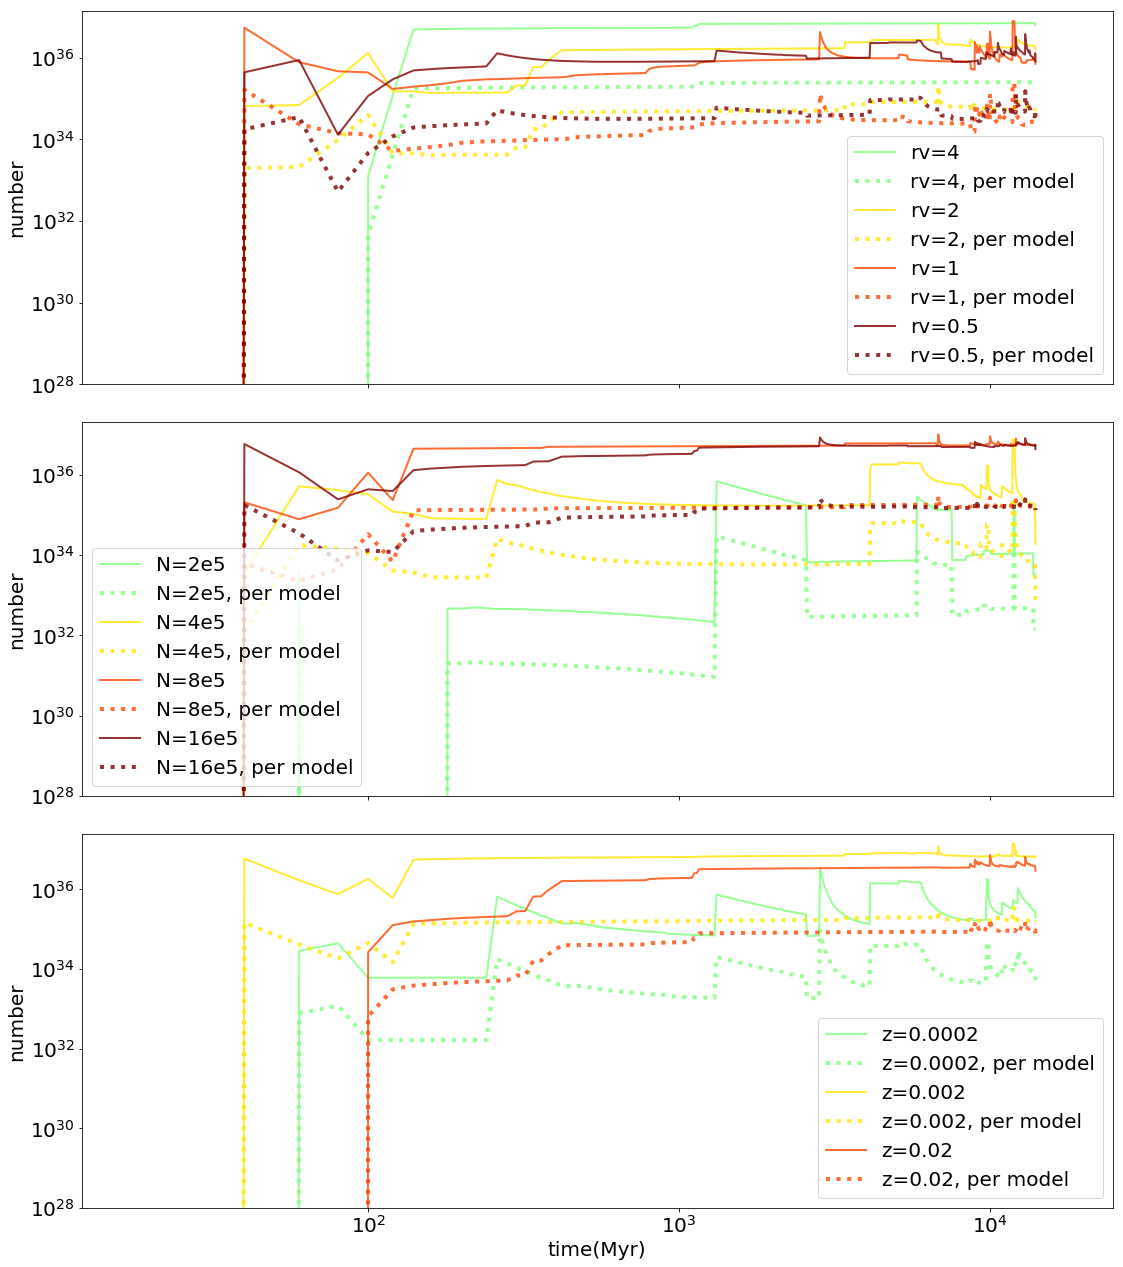

In [5]:
##Distribution of Gamma-ray luminosity vs. time
print(10**24)

data_lg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Lgamma_alltime.dat')
model_lg = data_lg[:,0]; t_myr_lg = data_lg[:,1]; Lmsp_lg = data_lg[:,2]

pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]

lg_dict = {}
for m in range(len(paths)):
    lg_dict[str(m)] = {}
    lg_dict[str(m)]['tmyr'] = []
    lg_dict[str(m)]['lmsp'] = []
    for n in range(len(model_lg)):
        if int(model_lg[n])==m:
            lg_dict[str(m)]['tmyr'].append(t_myr_lg[n])
            lg_dict[str(m)]['lmsp'].append(Lmsp_lg[n])

#print(lg_dict)

n_model_mass = [0,0,0,0]; n_model_rv = [0,0,0,0]; n_model_z = [0,0,0]
for ii in range(len(paths)):
    ##Initial Conditions
    s=paths[ii].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    if n_star==200000. and status[ii]=='1': 
        n_model_mass[0]+=1
    if n_star==400000. and status[ii]=='1': 
        n_model_mass[1]+=1
    if n_star==800000. and status[ii]=='1': 
        n_model_mass[2]+=1
    if n_star==1600000. and status[ii]=='1': 
        n_model_mass[3]+=1
        
    if rv==4. and status[ii]=='1': 
        n_model_rv[0]+=1
    if rv==2. and status[ii]=='1': 
        n_model_rv[1]+=1
    if rv==1. and status[ii]=='1': 
        n_model_rv[2]+=1
    if rv==0.5 and status[ii]=='1': 
        n_model_rv[3]+=1
        
        
    if z==0.0002 and status[ii]=='1': 
        n_model_z[0]+=1
    if z==0.002 and status[ii]=='1': 
        n_model_z[1]+=1
    if z==0.02 and status[ii]=='1': 
        n_model_z[2]+=1
        
print(n_model_mass, n_model_rv, n_model_z)

##Grouping models        
l_msp_rv = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_rv_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

l_msp_mass = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_mass_average = [np.zeros(700),np.zeros(700),np.zeros(700),np.zeros(700)]

l_msp_z = [np.zeros(700),np.zeros(700),np.zeros(700)]
l_msp_z_average = [np.zeros(700),np.zeros(700),np.zeros(700)]
#print(n_msp_rv)

t_all = np.linspace(0, 14000., 701)
for kk in range(len(paths)):
    
    ##Initial Conditions
    s=paths[kk].split('/')
    n_star=float(s[-2])
    z=float(s[-3][1:])
    rg=int(s[-4][2:])
    rv=float(s[-5][2:])
    
    tmyr = lg_dict[str(kk)]['tmyr']; lmsp = lg_dict[str(kk)]['lmsp']
    
    if not tmyr:
        continue
    
    ##Interpolate the number of NS data
    if len(tmyr)>2:
        f = interp1d(tmyr, lmsp, kind='nearest')
        t_interpld = np.linspace(np.min(tmyr), np.max(tmyr), 1000)
        lmsp_new = f(t_interpld)
        #print(n_msp_new)
    else:
        t_interpld = tmyr
        lmsp_new = lmsp
    
    l_mass = [[],[],[],[]]; l_rv = [[],[],[],[]]; l_z = [[],[],[]]
    for jj in range(len(t_all)-1):
        l_mass_temp = [0,0,0,0]; l_rv_temp = [0,0,0,0]; l_z_temp = [0,0,0]
        count_mass = [0,0,0,0]; count_rv = [0,0,0,0]; count_z = [0,0,0]
            
        ##Group by initial mass
        if n_star==200000. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[0]+=lmsp_new[i]
                    count_mass[0]+=1
        
        if n_star==400000. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[1]+=lmsp_new[i]
                    count_mass[1]+=1
        
        if n_star==800000. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[2]+=lmsp_new[i]
                    count_mass[2]+=1
        
        if n_star==1600000. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_mass_temp[3]+=lmsp_new[i]
                    count_mass[3]+=1
            
        ##Group by initial rv   
        if rv==4. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[0]+=lmsp_new[i]
                    count_rv[0]+=1
        
        if rv==2. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[1]+=lmsp_new[i]
                    count_rv[1]+=1
        
        if rv==1. and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[2]+=lmsp_new[i]
                    count_rv[2]+=1
        
        if rv==0.5 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_rv_temp[3]+=lmsp_new[i]
                    count_rv[3]+=1
                    
        
        ##Group by metallicity   
        if z==0.0002 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[0]+=lmsp_new[i]
                    count_z[0]+=1
        
        if z==0.002 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[1]+=lmsp_new[i]
                    count_z[1]+=1
        
        if z==0.02 and status[kk]=='1':
            for i in range(len(t_interpld)):
                if t_all[jj] <= t_interpld[i] < t_all[jj+1]:
                    l_z_temp[2]+=lmsp_new[i]
                    count_z[2]+=1
        
        #print(count_rv[0])
        
        for x in range(4):
            if count_rv[x]!=0:
                l_rv_temp[x] = l_rv_temp[x]/count_rv[x]
            if count_mass[x]!=0:
                l_mass_temp[x] = l_mass_temp[x]/count_mass[x]
                
            l_rv[x].append(l_rv_temp[x])
            l_mass[x].append(l_mass_temp[x])
            
        for x in range(3):
            if count_z[x]!=0:
                l_z_temp[x] = l_z_temp[x]/count_z[x]
                
            l_z[x].append(l_z_temp[x])
            
            
    for y in range(4):
        l_msp_rv[y] = l_msp_rv[y]+np.array(l_rv[y])
        l_msp_mass[y] = l_msp_mass[y]+np.array(l_mass[y])
        l_msp_rv_average[y] = l_msp_rv_average[y] + np.array(l_rv[y])/n_model_rv[y]
        l_msp_mass_average[y] = l_msp_mass_average[y] + np.array(l_mass[y])/n_model_mass[y]
        
    for y in range(3):
        l_msp_z[y] = l_msp_z[y]+np.array(l_z[y])
        l_msp_z_average[y] = l_msp_z_average[y] + np.array(l_z[y])/n_model_z[y]


    
#print(n_msp_rv[0], n_msp_rv[3])
#print(len(n_msp_rv[0]))
print(l_msp_rv[0]); print(type(l_msp_rv_average[0]))
rv_label = ['4','2','1','0.5']
mass_label = ['2e5', '4e5', '8e5', '16e5']
z_label = ['0.0002', '0.002', '0.02']
cs = cm.jet(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([cs[0], cs[1], cs[2], cs[3]])
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=3, figsize = (16,18), sharex=True)
for z in range(4):
    l_msp_rv[z] = np.insert(l_msp_rv[z], 0, 0.); l_msp_rv_average[z] = np.insert(l_msp_rv_average[z], 0, 0.)
    l_msp_mass[z] = np.insert(l_msp_mass[z], 0, 0.); l_msp_mass_average[z] = np.insert(l_msp_mass_average[z], 0, 0.)
    axs[0].plot(t_all, l_msp_rv[z], label = 'rv='+rv_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[1].plot(t_all, l_msp_mass[z], label = 'N='+mass_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[0].plot(t_all, l_msp_rv_average[z], label = 'rv='+rv_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    axs[1].plot(t_all, l_msp_mass_average[z], label = 'N='+mass_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)

for z in range(3):
    l_msp_z[z] = np.insert(l_msp_z[z], 0, 0.); l_msp_z_average[z] = np.insert(l_msp_z_average[z], 0, 0.)
    axs[2].plot(t_all, l_msp_z[z], label = 'z='+z_label[z], color = cs[z], lw = 2, alpha=0.8)
    axs[2].plot(t_all, l_msp_z_average[z], label = 'z='+z_label[z]+', per model', color = cs[z], ls = 'dotted', lw = 4, alpha = 0.8)
    
    
axs[0].set_xscale('symlog')
axs[0].set_yscale('log')
axs[0].set_xlim(xmin = 12)
axs[0].set_ylim(ymin = 10**8*10.**20)
#axs[0].set_xlabel('time(Myr)')
axs[0].set_ylabel('number')
axs[0].legend(loc='best')

axs[1].set_xscale('symlog')
axs[1].set_yscale('log')
axs[1].set_xlim(xmin = 12)
axs[1].set_ylim(ymin = 10**8*10.**20)
#axs[1].set_xlabel('time(Myr)')
axs[1].set_ylabel('number')
axs[1].legend(loc='best')

axs[2].set_xscale('symlog')
axs[2].set_yscale('log')
axs[2].set_xlim(xmin = 12)
axs[2].set_ylim(ymin = 10**8*10.**20)
axs[2].set_xlabel('time(Myr)')
axs[2].set_ylabel('number')
axs[2].legend(loc='best')

plt.tight_layout()

/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg2/z0.02/1.6e6/
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

(-0.1, 18008.278817320144)

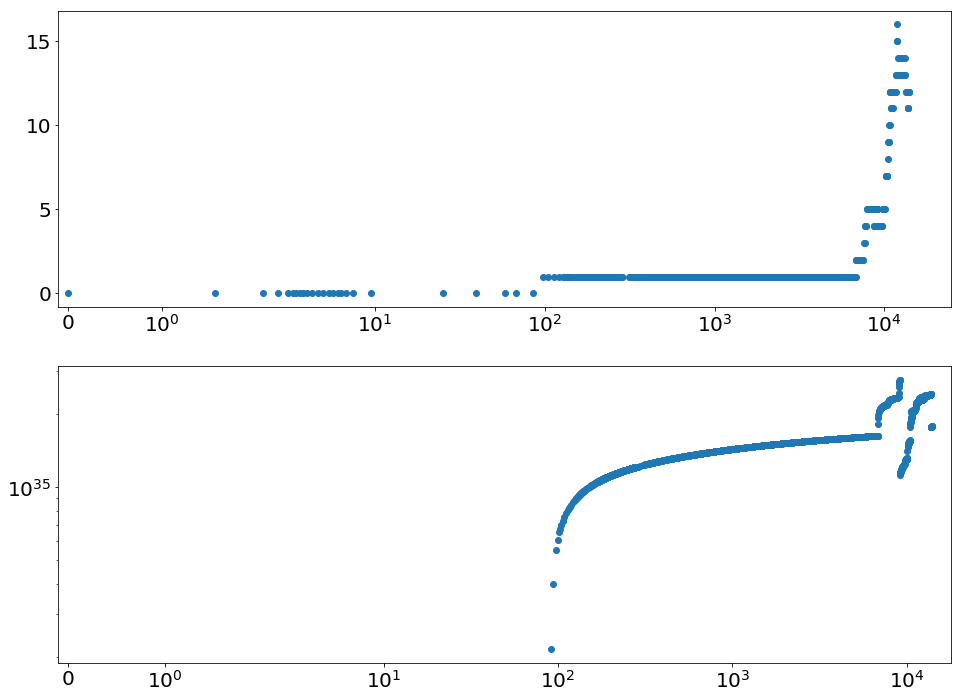

In [18]:
##Plot Nmsp vs. time and Lmsp vs. time for one model
data_lg = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/Lgamma_alltime_catalog.dat')
model_lg = data_lg[:,0]; t_myr_lg = data_lg[:,1]; Lmsp_lg = data_lg[:,2]

pathlist = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', dtype=str)
paths = pathlist[:,0]; status = pathlist[:,1]


lg_dict = {}
for m in range(len(paths)):
    lg_dict[str(m)] = {}
    lg_dict[str(m)]['tmyr'] = []
    lg_dict[str(m)]['lmsp'] = []
    for n in range(len(model_lg)):
        if int(model_lg[n])==m:
            lg_dict[str(m)]['tmyr'].append(t_myr_lg[n])
            lg_dict[str(m)]['lmsp'].append(Lmsp_lg[n])
            
model_no =11
print(paths[model_no])
datans = np.genfromtxt(paths[model_no]+'initial.ns.dat')
t_conv = dyn.conv('t', paths[model_no]+'initial.conv.sh')
t_tot = np.array(datans[:,0])*t_conv; n_msp = datans[:,6]
print(n_msp)

print(lg_dict[str(model_no)]['lmsp'])

matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(nrows=2, figsize = (16,12))
axs[0].scatter(t_tot, n_msp)
axs[1].scatter(lg_dict[str(model_no)]['tmyr'], lg_dict[str(model_no)]['lmsp'])

axs[0].set_xscale('symlog')
axs[0].set_xlim(xmin = -0.1)

axs[1].set_xscale('symlog')
axs[1].set_yscale('log')
axs[1].set_xlim(xmin = -0.1)
#axs[1].set_ylim(ymin = 10000000.*10.**20)

In [ ]:
##Plot characteristic age of pulsars

###Model Data###
datamsp=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/msps_last.dat')
datapsr=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/normalpsr_last.dat')

B=np.array(datamsp[:,4]); P=np.array(datamsp[:,5])
Bpsr=np.array(datapsr[:,4]); Ppsr=np.array(datapsr[:,5])

Pdot=Kconst*yearsc*B*B/P
Pdotpsr=Kconst*yearsc*Bpsr*Bpsr/Ppsr

Ptot=np.concatenate((P, Ppsr), axis=0)
Pdottot=np.concatenate((Pdot, Pdotpsr), axis=0)

tau=0.5*Ptot/Pdottot
tau=tau/yearsc/10**9
taumsp=0.5*P/Pdot
taumsp=taumsp/yearsc/10**9
taupsr=0.5*Ppsr/Pdotpsr
taupsr=taupsr/yearsc/10**9

weights = np.ones_like(tau)/float(len(tau))

matplotlib.rcParams.update({'font.size': 16})
plt.figure()
#plt.hist(tau, bins=np.logspace(np.log10(min(tau)), np.log10(max(tau)), 20), alpha=0.7)
plt.hist(taumsp, bins=np.logspace(np.log10(min(taumsp)), np.log10(max(taumsp)), 20), histtype='stepfilled', alpha=0.7, label='MSP')
plt.hist(taupsr, bins=np.logspace(np.log10(min(taupsr)), np.log10(max(taupsr)), 25), histtype='stepfilled', alpha=0.7, label='Slow PSR')
plt.xscale('log')
plt.legend(loc='upper left')
plt.xlabel(r'$\tau\,(Gyr)$')

In [ ]:
##Plot the distribution of formation time of MSPs
historyfiles=np.sort(glob('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/MSPBHinGC/data/history/MSP/*'))

ft=[]
for i in range(len(historyfiles)):
    with open(historyfiles[i], 'r') as fhist:
        next(fhist)
        for line in fhist:
            datahist=line.split()
            if int(datahist[8])==13 and float(datahist[2])<=0.03:
                ft.append(float(datahist[0])/1000.)
                break
            
plt.figure()
plt.hist(ft, bins=10, alpha=0.7)
plt.xlabel('Formation Time (Gyr)')
plt.ylabel('N')

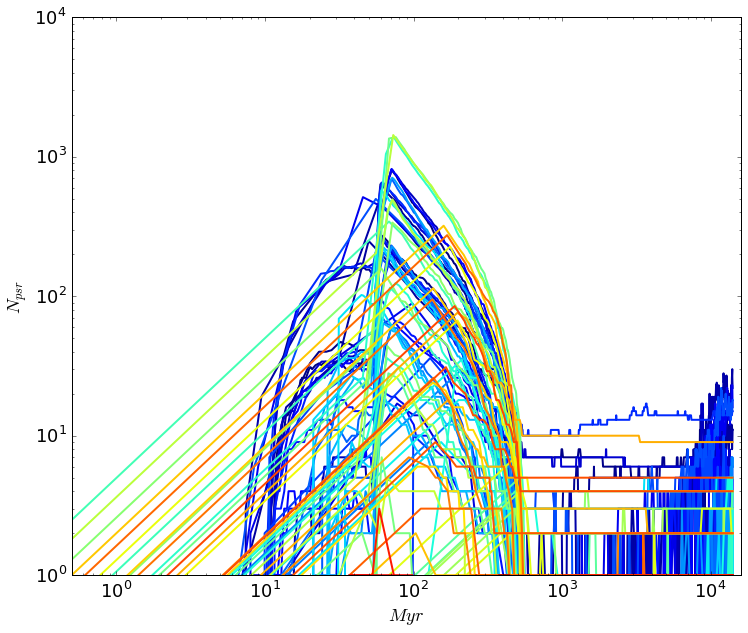

In [42]:
##Cumulative distribution of Npsr vs. time
paths=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/path_nondissolved_newruns.dat', dtype=str)
#print paths

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 10]
c = cm.jet(np.linspace(0, 1, 110))

plt.figure()
for i in range(len(paths)):
    filestr=paths[i]+'initial'
    datans=np.genfromtxt(filestr+'.ns.dat')
    t_conv=ns.conv('t', filestr+'.conv.sh')
    t=np.array(datans[:,0])*t_conv; Npsr=np.array(datans[:,5])
    plt.plot(t, Npsr, color=c[i], lw=2.)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5, 16000.)
#plt.ylim(-0.5, 1000.)
plt.xlabel(r'$Myr$')
plt.ylabel(r'$N_{psr}$')